In [1]:
import pandas as pd

# read CSV-tiedosto
df = pd.read_csv('Urban_Park_Ranger_Animal_Condition_Response_20250616.csv')

# show 
df.head()

,Date and Time of initial call,Date and time of Ranger response,Borough,Property,Location,Species Description,Call Source,Species Status,Animal Condition,Duration of Response,...,311SR Number,Final Ranger Action,# of Animals,PEP Response,Animal Monitored,Rehabilitator,Hours spent monitoring,Police Response,ESU Response,ACC Intake Number
0,06/23/2021 04:45:00 PM,06/24/2021 08:00:00 AM,Brooklyn,Sternberg Park,Inside locked athletic field under construction,Chukar,Other,Exotic,Healthy,6.00,...,311-06712416,ACC,6.0,False,False,NaN,NaN,False,False,163537
1,06/24/2021 10:00:00 AM,06/24/2021 11:00:00 AM,Bronx,Haffen Park,Haffen Pool,Sparrow,Central,Native,Healthy,1.75,...,311-06714879,Rehabilitator,4.0,False,False,NaN,NaN,False,False,NaN
2,06/23/2021 02:30:00 PM,06/23/2021 02:30:00 PM,Bronx,Pelham Bay Park,Pelham Bay South,White-tailed Deer,Employee,Native,NaN,1.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
3,06/23/2021 01:00:00 PM,06/23/2021 01:10:00 PM,Staten Island,Willowbrook Park,The carousel,Raccoon,Employee,Native,NaN,2.00,...,NaN,Unfounded,0.0,False,False,NaN,NaN,False,False,NaN
4,06/23/2021 09:20:00 AM,06/23/2021 09:20:00 AM,Queens,Judge Moses Weinstein Playground,Garbage can,Virginia Opossum,Central,Native,Healthy,2.25,...,311-06699415,ACC,1.0,False,False,NaN,NaN,False,False,119833


In [3]:
df['Date and Time of initial call'] = pd.to_datetime(df['Date and Time of initial call'])


In [4]:
df['Date and time of Ranger response'] = pd.to_datetime(df['Date and time of Ranger response'])


<Axes: title={'center': 'Animal reports per day'}, xlabel='Month'>

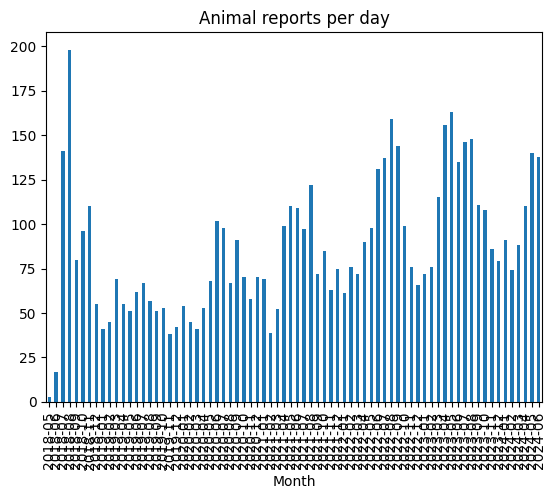

In [6]:
df['Month'] = df['Date and Time of initial call'].dt.to_period('M')
df['Month'].value_counts().sort_index().plot(kind='bar', title='Animal reports per day')


<Axes: title={'center': ' Animal Raports per Borough'}, xlabel='Borough'>

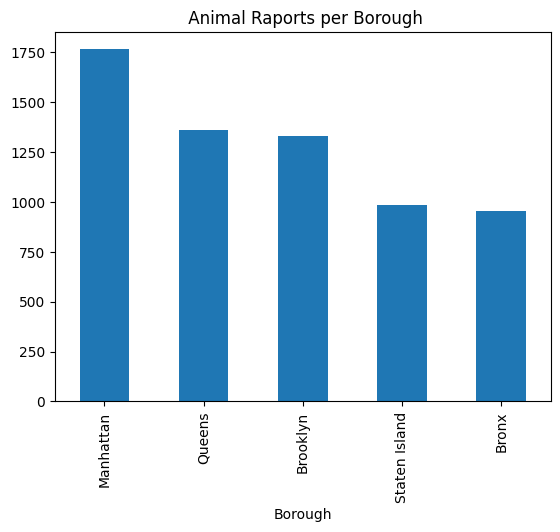

In [10]:
df['Borough'].value_counts().plot(kind='bar', title=' Animal Raports per Borough')


<Axes: title={'center': 'Top 10 Types of Anuimal'}, xlabel='Species Description'>

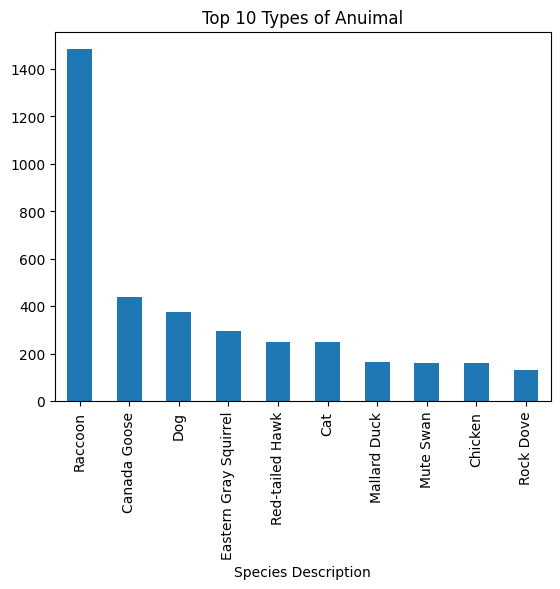

In [9]:
df['Species Description'].value_counts().head(10).plot(kind='bar', title='Top 10 Types of Anuimal')


<Axes: title={'center': 'How was the animal'}, ylabel='count'>

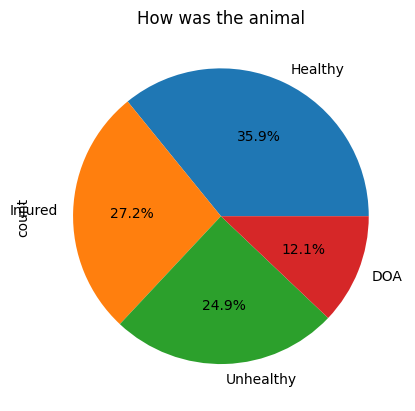

In [11]:
df['Animal Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='How was the animal')


<Axes: title={'center': 'Who did the report?'}, xlabel='Call Source'>

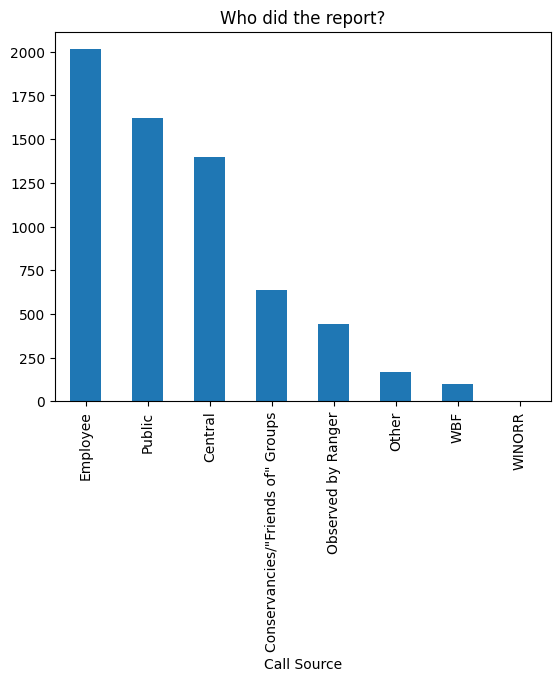

In [13]:
df['Call Source'].value_counts().plot(kind='bar', title='Who did the report?')


In [15]:
df_grouped = df.groupby(['Borough', 'Species Description']).size().reset_index(name='count')


In [16]:
top_species_per_borough = df_grouped.sort_values(['Borough', 'count'], ascending=[True, False]) \
                                    .groupby('Borough').first().reset_index()
print(top_species_per_borough)


         Borough Species Description  count
0          Bronx             Raccoon    156
1       Brooklyn             Raccoon    316
2      Manhattan             Raccoon    552
3         Queens             Raccoon    373
4  Staten Island        Canada Goose    120


In [18]:
raccoons = df[df['Species Description'].str.lower() == 'raccoon']


In [19]:
# Eläinten kunto
raccoons['Animal Condition'].value_counts()

# Rangerin viimeinen toimenpide
raccoons['Final Ranger Action'].value_counts()

# Miten usein ACC, Rehabilitator tai Unfounded


Final Ranger Action
ACC                              769
Unfounded                        317
Relocated/Condition Corrected    270
Monitored Animal                  93
Advised/Educated others           49
Rehabilitator                     14
Submitted for DEC Testing          5
Name: count, dtype: int64

<Axes: title={'center': 'Pesukarhuraportit per kaupunginosa'}, xlabel='Borough'>

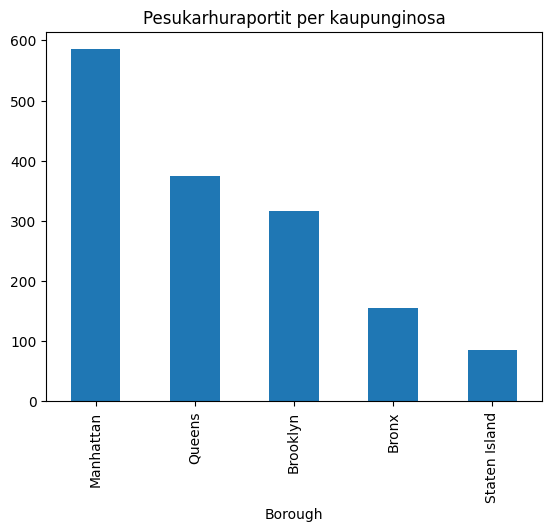

In [20]:
raccoons['Borough'].value_counts().plot(kind='bar', title='Pesukarhuraportit per kaupunginosa')


In [21]:
raccoons['response_time'].describe()

count    1517.000000
mean        1.242507
std        16.362059
min      -407.833333
25%         0.083333
50%         0.250000
75%         0.750000
max       274.000000
Name: response_time, dtype: float64

<Axes: title={'center': 'How many raccoons were involved in the accident?'}, xlabel='# of Animals'>

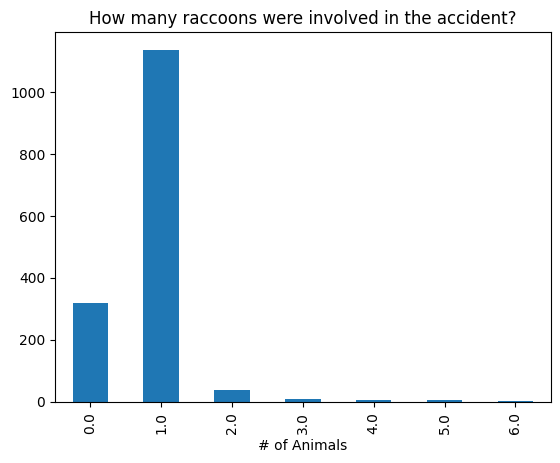

In [23]:
raccoons['# of Animals'].value_counts().sort_index().plot(kind='bar', title='How many raccoons were involved in the accident?')
